In [29]:
import numpy as np
import sys
import scipy.io as sio
import os
import operator
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [21]:
base_dir = '/data/amnh/darwin/'
#curves_fft_dir = base_dir + 'image_csvs_fft_clean/'
curves_fft_dir = base_dir + 'image_csvs_fft/'
fft_similarity_dir = base_dir + 'fft_similarity_clean/'
fft_matched_images_dir = base_dir + 'example_matching_edges/rn_match/rn_matched_images/'

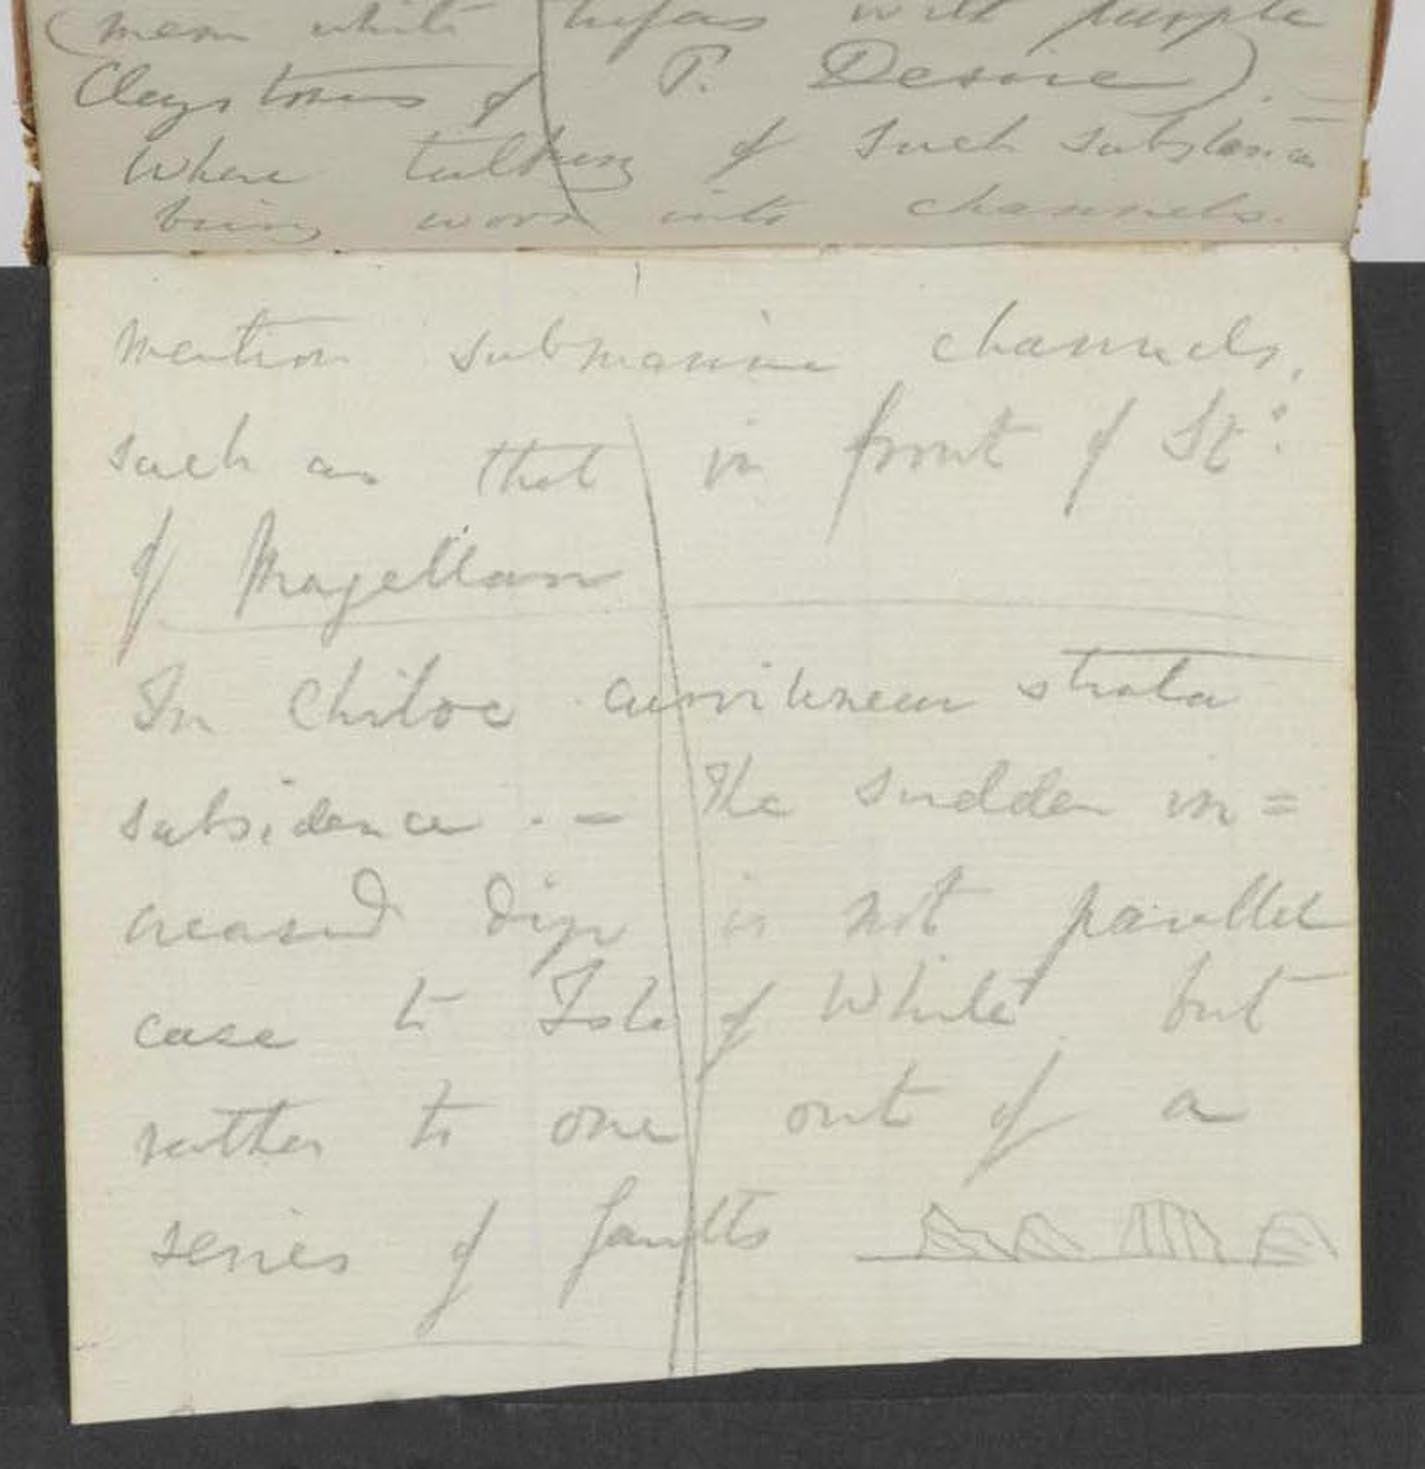

In [12]:
sim_score_map = {}
imagename2 = fft_matched_images_dir + '72964_RN-87-(stub).jpg'
Image(filename=imagename2) 

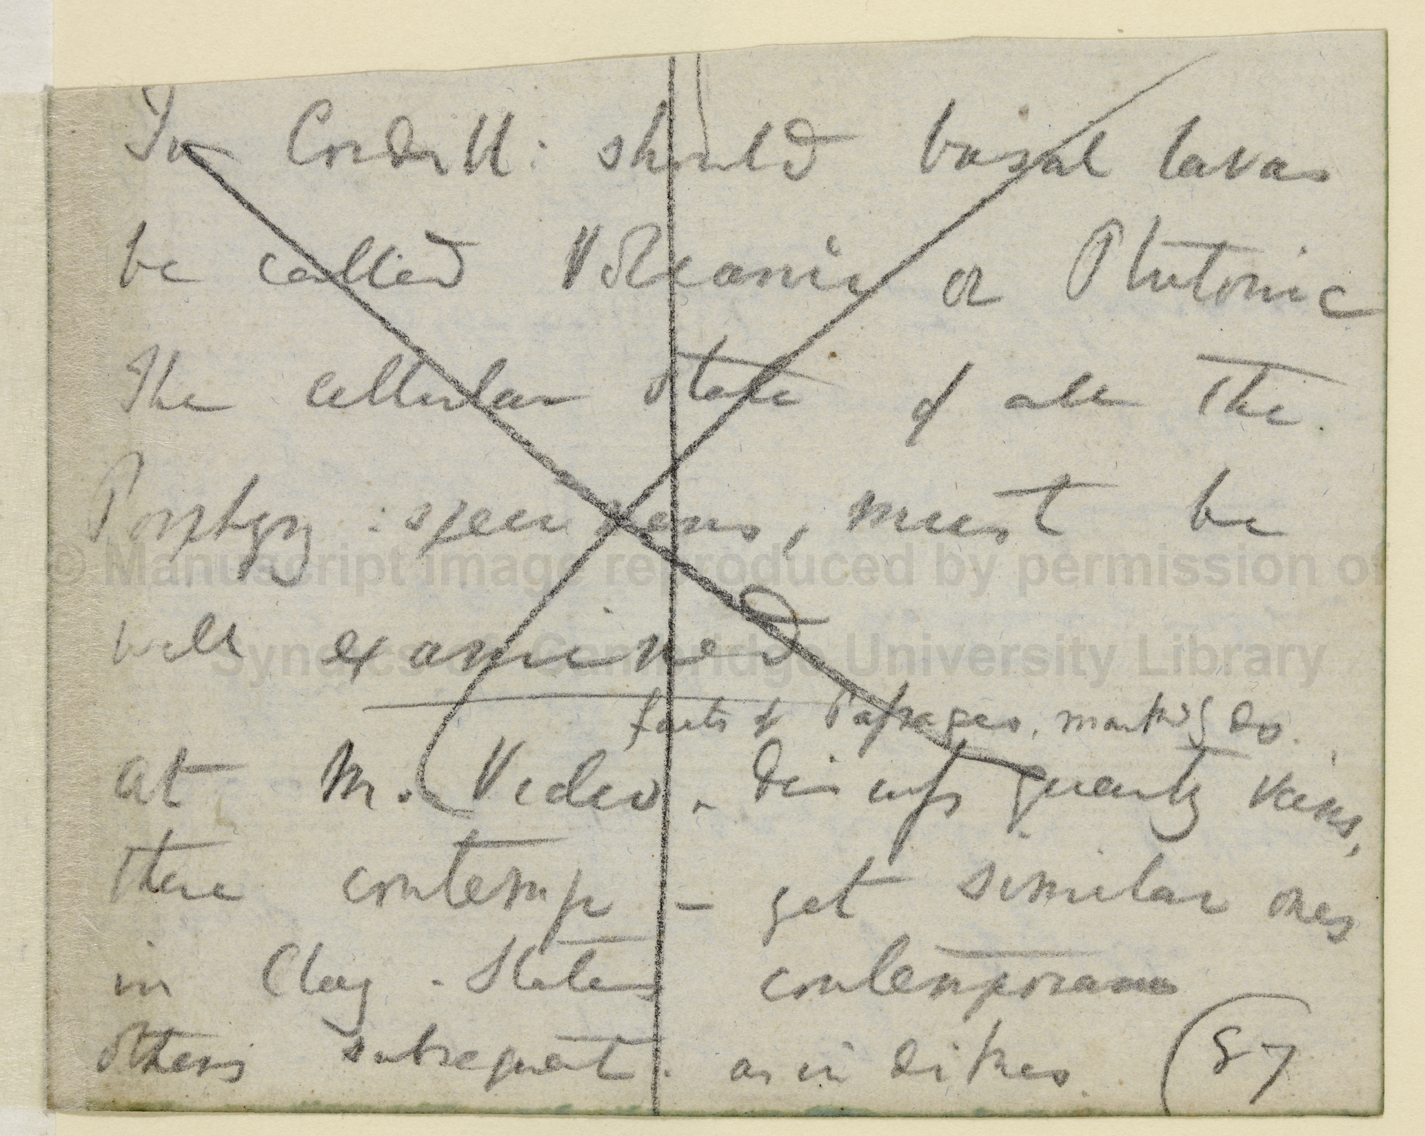

In [13]:
imagename1 = fft_matched_images_dir + '77633_DAR_40_12_bottom_.jpg'
Image(filename=imagename1)

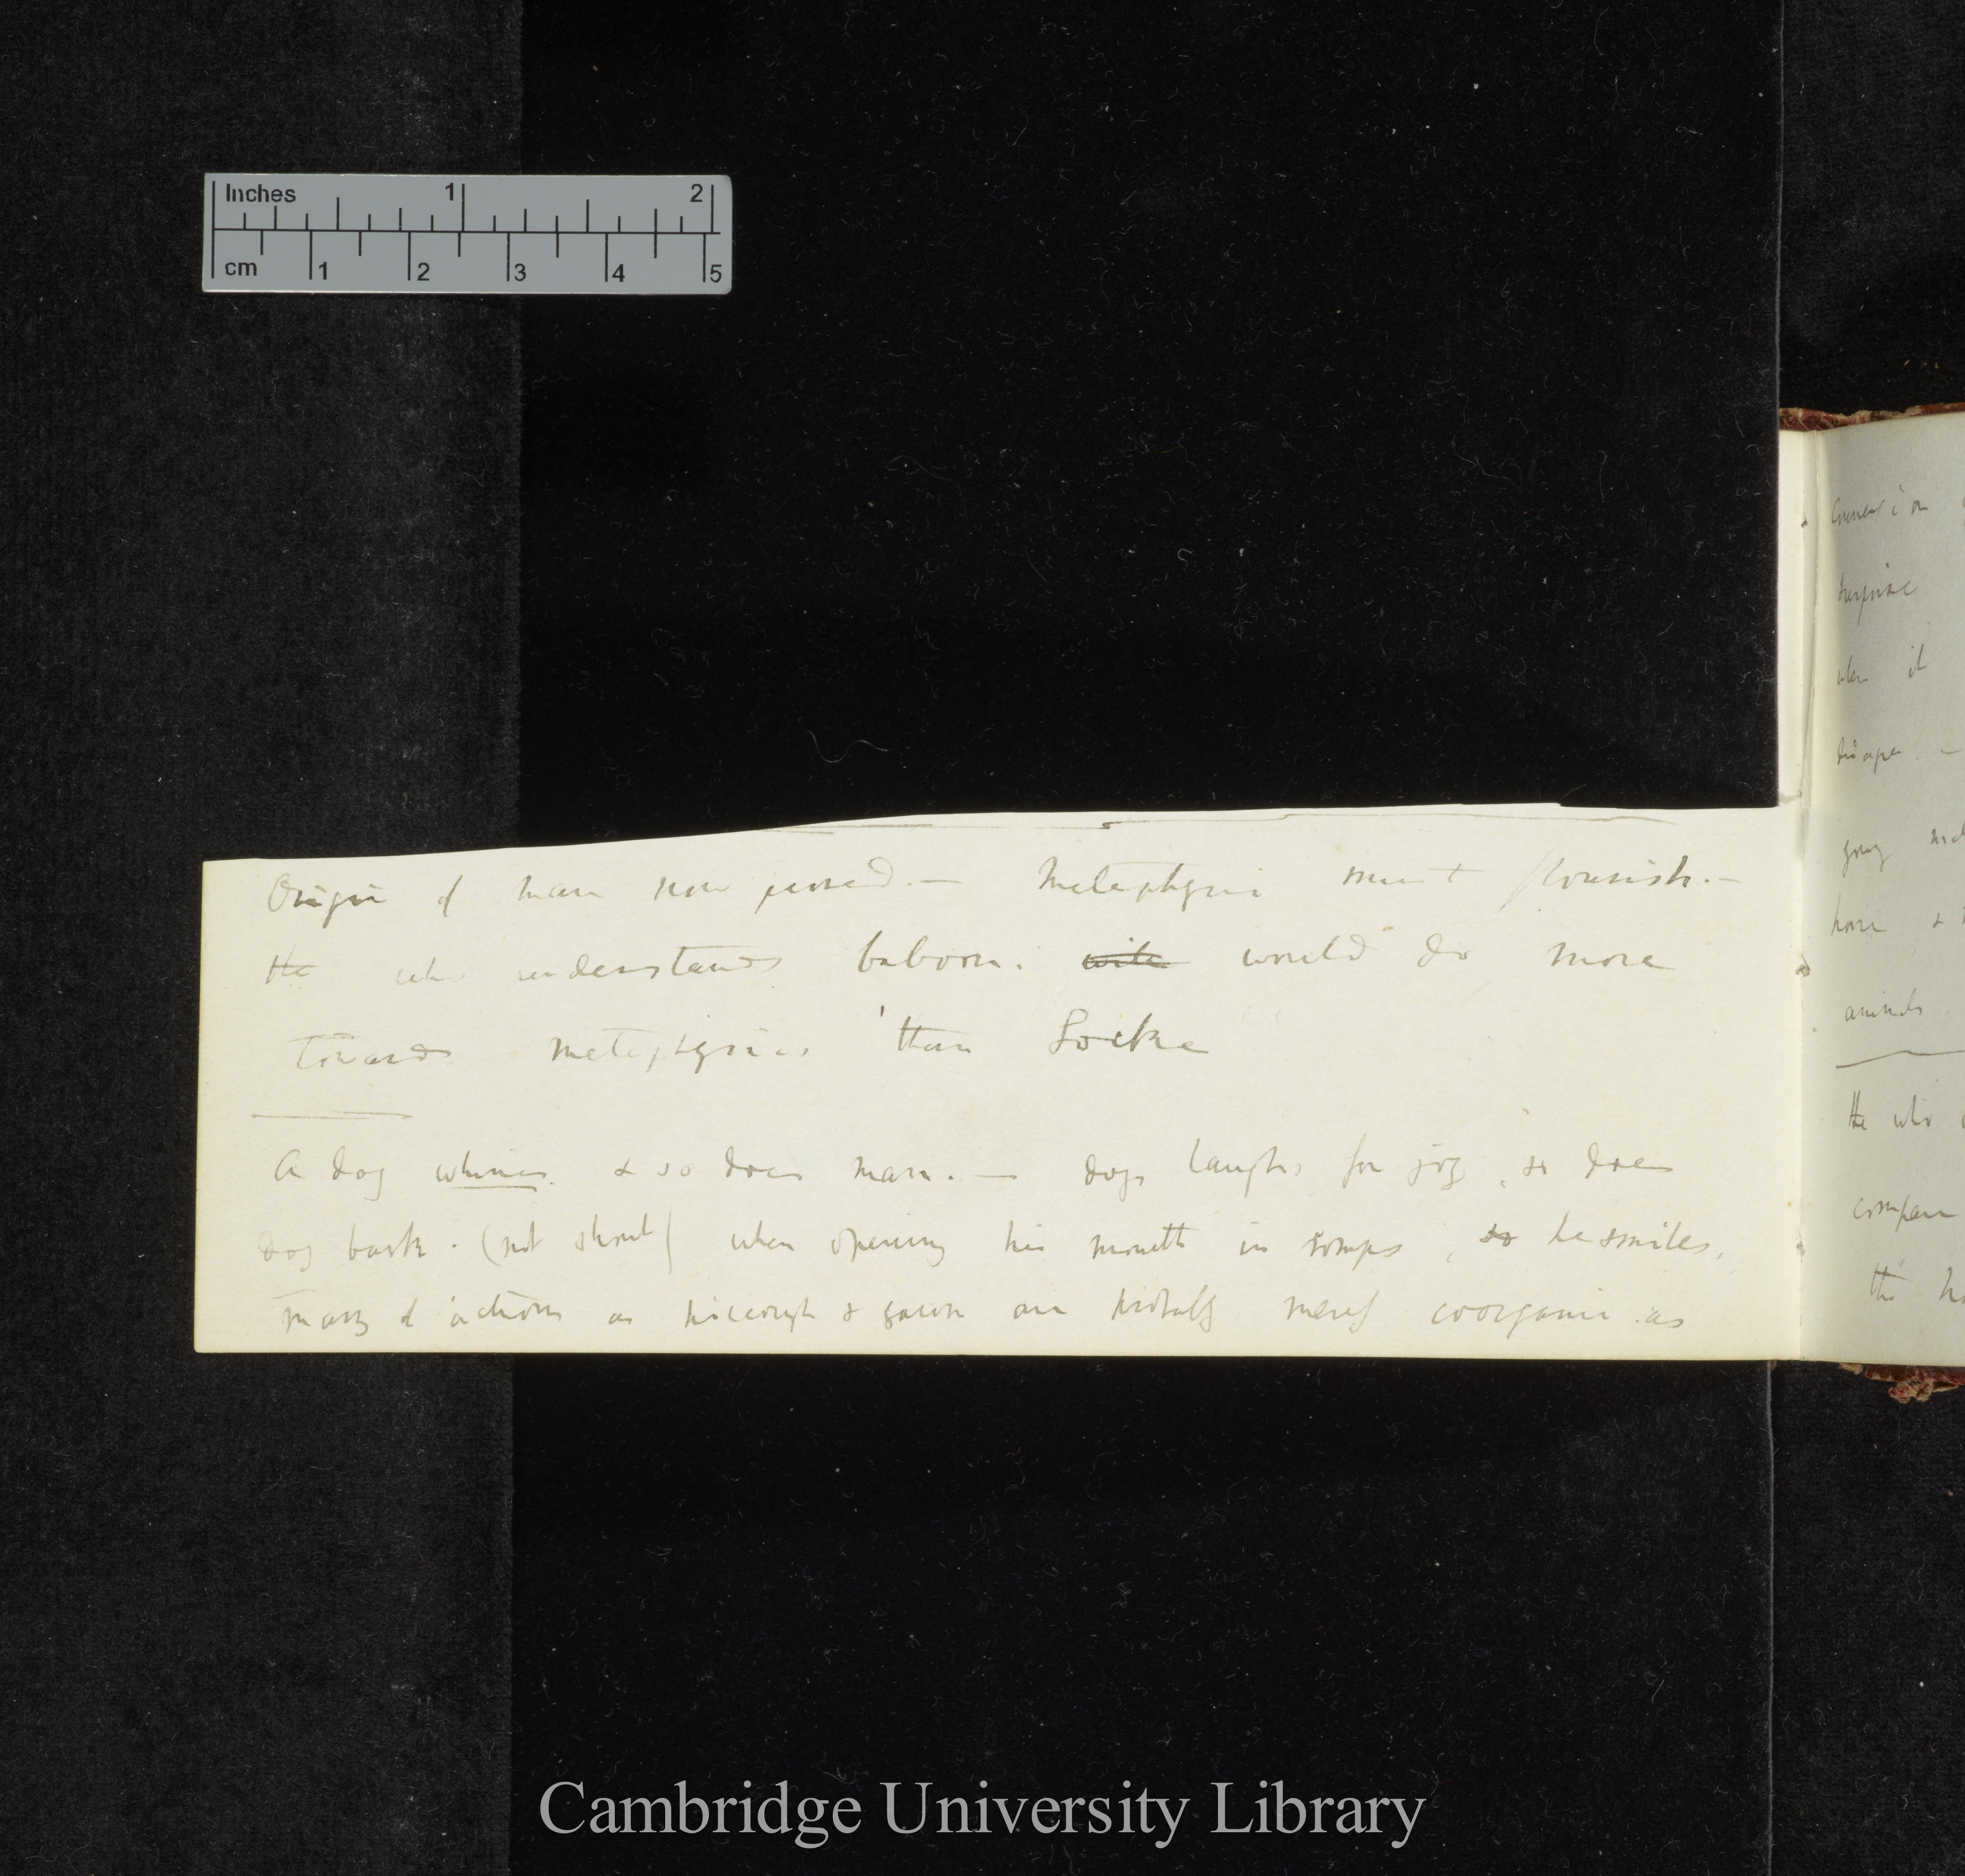

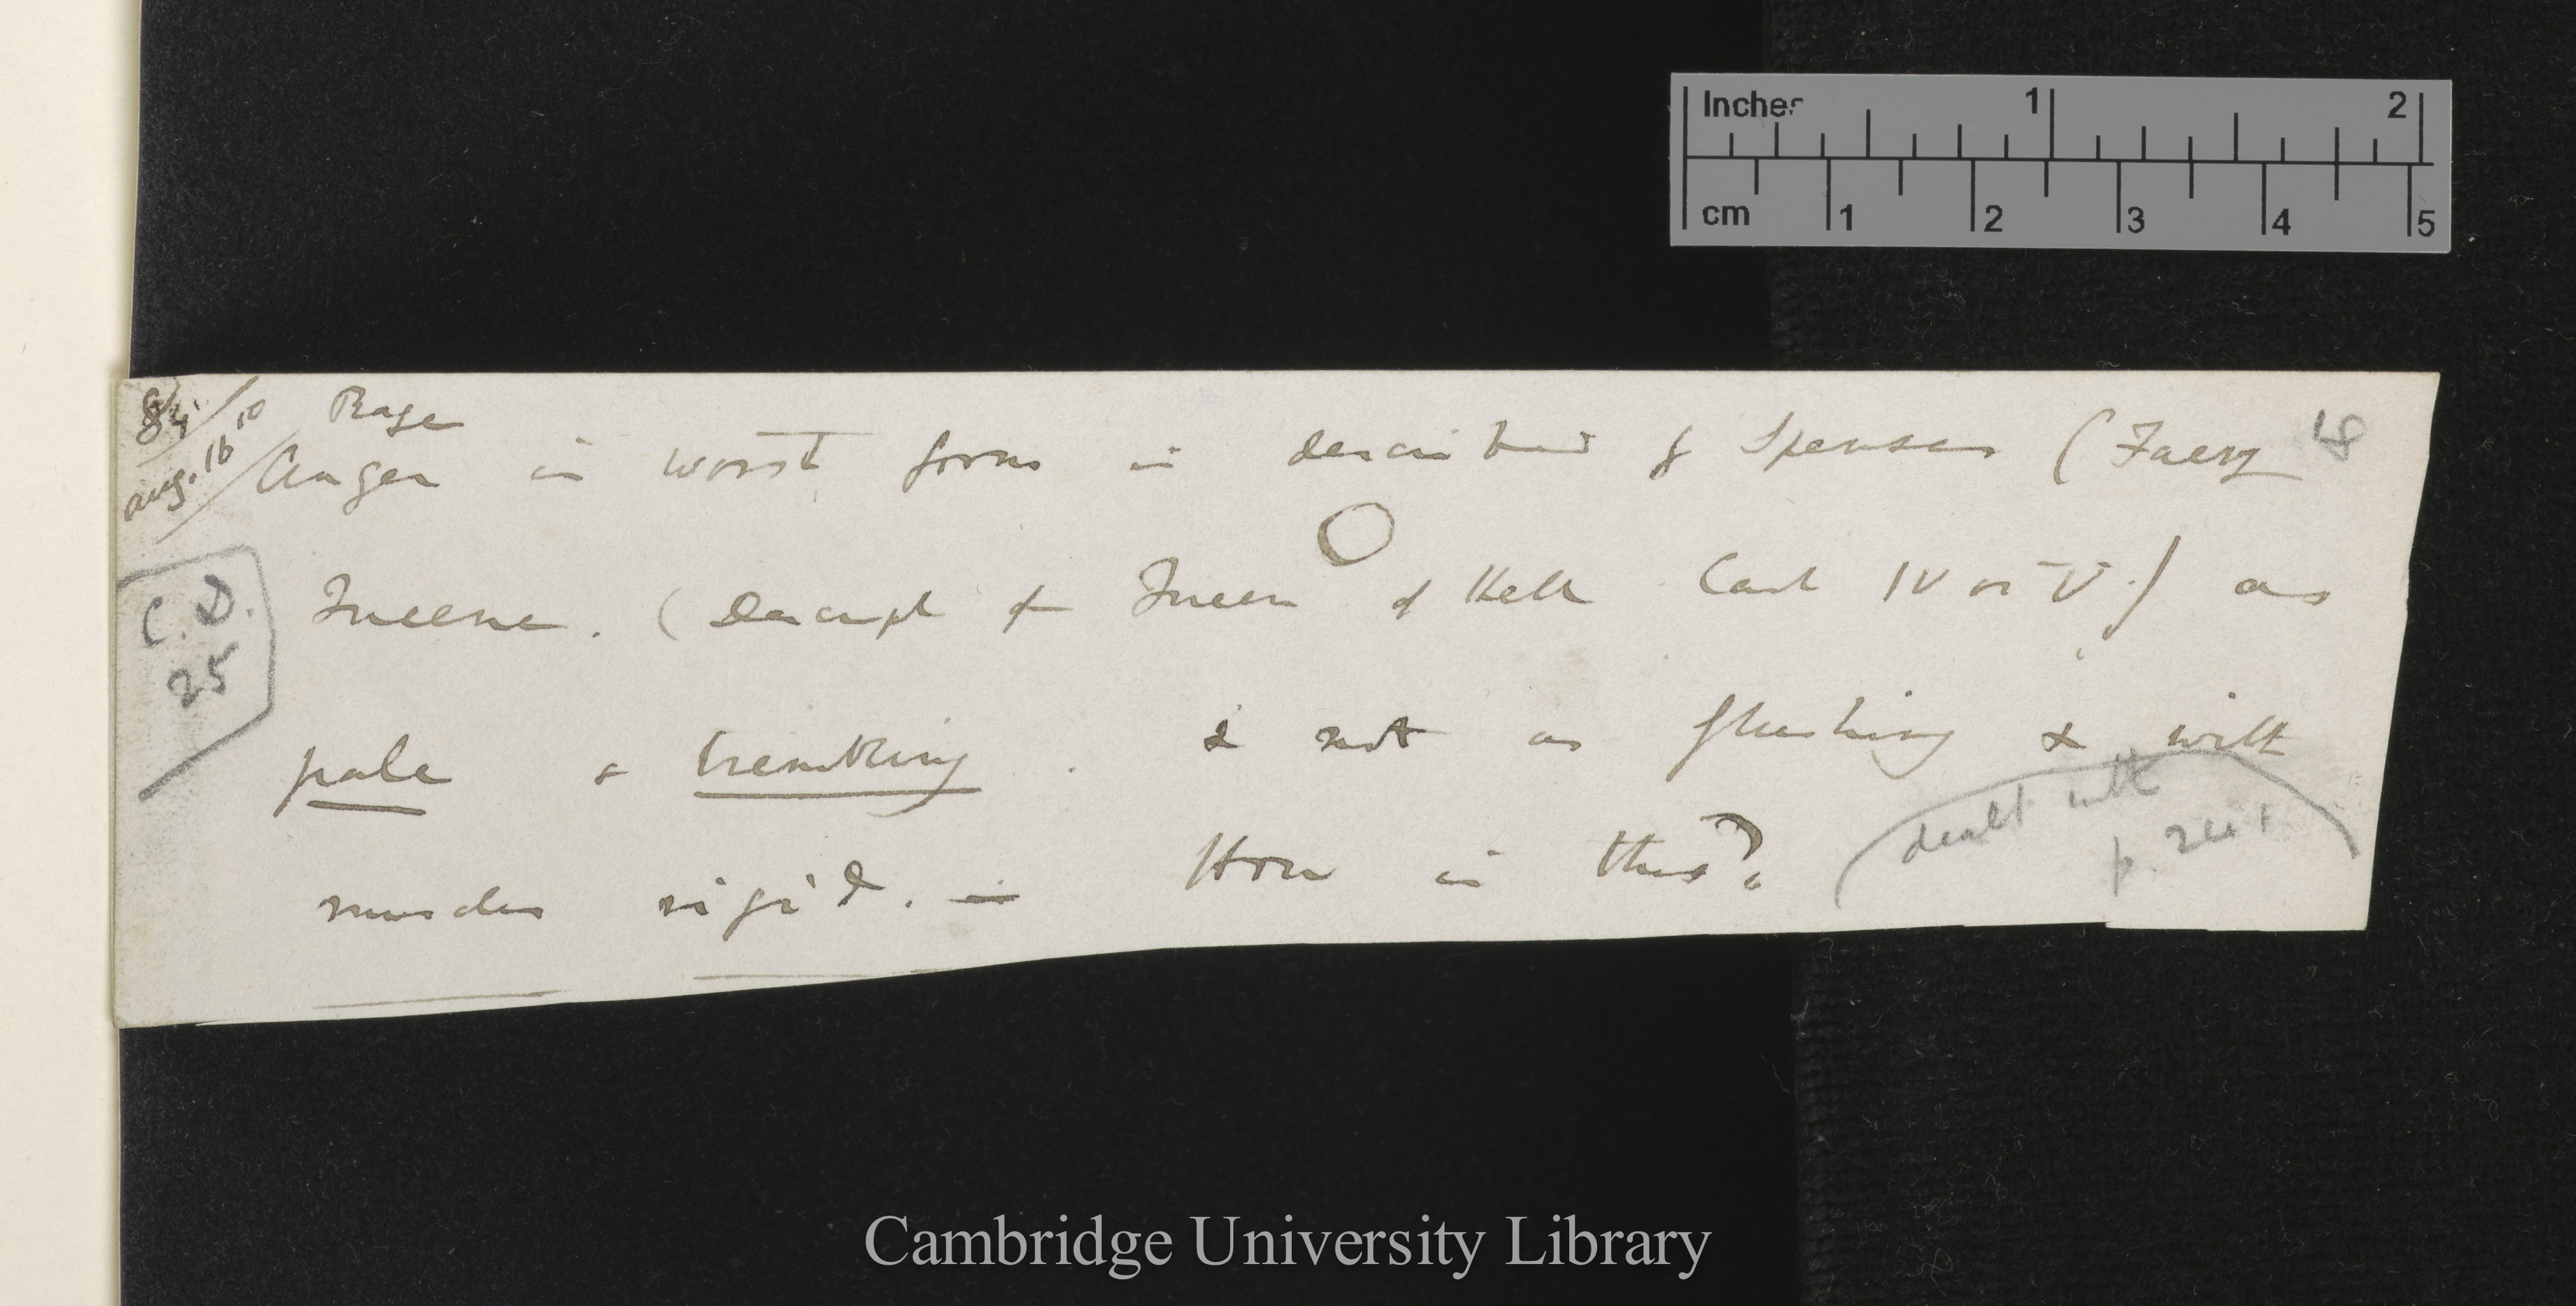

In [17]:
def similarity_score(curve1_filename, curve2_filename):
    curve1_name = curves_fft_dir + curve1_filename
    curve2_name = curves_fft_dir + curve2_filename

    fft1 = sio.loadmat(curve1_name)['fft']
    fft2 = sio.loadmat(curve2_name)['fft']

    # zero out scaling and rotation components
    fft1[0][0] = 0
    fft2[0][0] = 0
    norm1 = np.linalg.norm(fft1)
    norm2 = np.linalg.norm(fft2)
    dot_product = np.absolute(np.vdot(fft1, fft2))
    mul_norm = norm1 * norm2
    if mul_norm != 0:
        return dot_product / mul_norm
    return 0

In [18]:
def stringify(x):
    float_score = '%.20f' % x[1]
    return x[0] + '\t' + float_score

In [23]:
ffts_dir = base_dir + 'image_csvs_fft/'
pair1 = '77633_DAR_40_12_bottom_edited_south_fft.mat'
pair2 = '72964_RN-87-stub_north_fft.mat'
sim_res = similarity_score(pair1, pair2)
print(sim_res)

0.997623381208


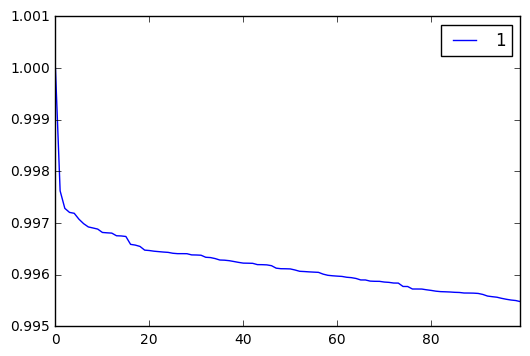

In [32]:
fft_sim_dir = base_dir + 'fft_similarity/'
fname = fft_sim_dir + '72964_RN-87-stub_north_fft_similarity.txt'
sim_data = pd.read_csv(fname, sep='\t', header=None)
sim_data.plot()
plt.show()


In [33]:
sim_data.head()

0         1
0               72964_RN-87-stub_north_fft.mat  1.000000
1  77633_DAR_40_12_bottom_edited_south_fft.mat  0.997623
2         MS-DAR-00087-000-00177_south_fft.mat  0.997286
3         MS-DAR-00016-000-00316_north_fft.mat  0.997207
4         MS-DAR-00086-000-00107_north_fft.mat  0.997190